# About

We realized that the shapes are different between subjects. Therefore, to normalize differences, we will automatically change intervals while taking slices.<br/>
First in this notebook we'll present the differences between shapes.

File sizes : Shape
* 43.5mb : (256, 256, 166)
* 23.6mb : (192, 192, 160)
* 47.2mb : (256, 256, 180)
* 42.5mb, 44.6mb ... There are many different imaging protocols.
> The problem with having different protocols is that we cannot risk taking slices from the edges where may provide additional information in some cases to figure out if there is early symptoms of the disease on particular slices from such as hippocampal area.

### Examples:
#### Subject ID: 136_S_0426 (M) -> 43.5mb : (256, 256, 166) <br/>
> Imaging Protocol	:	Acquisition Plane=SAGITTAL; Acquisition Type=3D; Coil=8HRBRAIN; Field Strength=1.5 tesla; Flip Angle=8.0 degree; Manufacturer=GE MEDICAL SYSTEMS; Matrix X=256.0 pixels; Matrix Y=256.0 pixels; Matrix Z=166.0 ; Mfg Model=SIGNA EXCITE; Pixel Spacing X=0.9 mm; Pixel Spacing Y=0.9 mm; Pulse Sequence=RM; Slice Thickness=1.2 mm; TE=3.8 ms; TI=1000.0 ms; TR=8.6 ms; Weighting=T1;

#### Subject ID: 099_S_1144 (M) -> 23.6mb : (192, 192, 160) <br/>
> Imaging Protocol	:	Acquisition Plane=SAGITTAL; Acquisition Type=3D; Coil=PA; Field Strength=1.5 tesla; Flip Angle=8.0 degree; Manufacturer=SIEMENS; Matrix X=192.0 pixels; Matrix Y=192.0 pixels; Matrix Z=160.0 ; Mfg Model=Symphony; Pixel Spacing X=1.3 mm; Pixel Spacing Y=1.3 mm; Pulse Sequence=IR/GR; Slice Thickness=1.2 mm; TE=3.6 ms; TI=1000.0 ms; TR=3000.0 ms; Weighting=T1;

#### Subject ID: 021_S_1109 (F) -> 47.2mb : (256, 256, 180) <br/>
> Imaging Protocol	:	Acquisition Plane=SAGITTAL; Acquisition Type=3D; Coil=HEAD; Field Strength=1.5 tesla; Flip Angle=8.0 degree; Manufacturer=GE MEDICAL SYSTEMS; Matrix X=256.0 pixels; Matrix Y=256.0 pixels; Matrix Z=180.0 ; Mfg Model=SIGNA EXCITE; Pixel Spacing X=0.9 mm; Pixel Spacing Y=0.9 mm; Pulse Sequence=RM; Slice Thickness=1.2 mm; TE=4.0 ms; TI=1000.0 ms; TR=9.1 ms; Weighting=T1;



In [2]:
import nibabel as nib
from nibabel.testing import data_path

import os
from pathlib import Path 

import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
class helper:
    def __init__(self):
        return
    

    def read_image(self, img_path):
        return nib.load(os.path.join(data_path, img_path)).get_fdata()
    

    def show_img(self, axis, sliceA, sliceB, img_path): 
        '''
            axis type -> axial, sagital or coronal,
            sliceA -> start point, 
            sliceB -> end point,
            n -> slice count
        '''
        img = self.read_image(img_path)                 
        print(f"Shape: {img.shape}")
        n = sliceB - sliceA

        # setting values to rows and column variables
        rows = int(np.ceil(np.sqrt(n)+1))
        cols = int(np.ceil(np.sqrt(n)))

        if(cols > 2):
            col_size = n * 1.25
            row_size = n * 2
        else:
            col_size = n * 1.5
            row_size = n * 3.2

        if axis == "axial":
            plot = figure(figsize=(col_size, row_size), dpi=77)
            for i in range(n):
                ax = plot.add_subplot(rows, cols, i + 1)
                ax.set_title(f'{sliceA + i}. Slice', fontsize= 11)
                ax.imshow(img[sliceA + i,:,:], cmap='gray')

        elif axis == "sagittal":
            plot = figure(figsize=(col_size, row_size), dpi=77)
            for i in range(n):
                ax = plot.add_subplot(rows, cols, i + 1)
                ax.set_title(f'{sliceA + i}. Slice', fontsize= 11)
                ax.imshow(img[:,:,sliceA + i], cmap='gray')

        elif axis == "coronal":
            plot = figure(figsize=(col_size, row_size), dpi=77)
            for i in range(n):
                ax = plot.add_subplot(rows, cols, i + 1)
                ax.set_title(f'{sliceA + i}. Slice', fontsize= 11)
                ax.imshow(img[:,sliceA + i,:], cmap='gray')
        
        else:    print("Wrong axis type!")
        plt.savefig(f'/Users/toygar/Desktop/Bitirme/data/figures/{axis}_{sliceA}_to_{sliceB}.pdf', bbox_inches="tight",
                pad_inches=0.3, transparent=False)
        plt.show()

In [4]:
h = helper()

In [5]:
path = '/Users/toygar/Desktop/Bitirme/data/'

3 different AD patients.

In [6]:
type1 = f'{path}ADNI/136_S_0426/MPR__GradWarp__B1_Correction__N3__Scaled/2006-05-16_15_51_24.0/I40356/ADNI_136_S_0426_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070215211810806_S14581_I40356.nii'
type2 = f'{path}ADNI/099_S_1144/MPR__GradWarp__B1_Correction__N3__Scaled/2007-08-10_13_44_12.0/I79241/ADNI_099_S_1144_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20071028202645607_S37181_I79241.nii'
type3 = f'{path}ADNI/021_S_1109/MPR__GradWarp__N3__Scaled/2006-12-05_14_24_09.0/I62695/ADNI_021_S_1109_MR_MPR__GradWarp__N3__Scaled_Br_20070727185946236_S23446_I62695.nii'

Shape: (256, 256, 166)


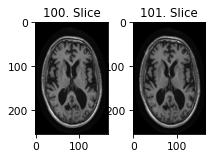

In [45]:
h.show_img('axial', 100, 102, type1)

Shape: (192, 192, 160)


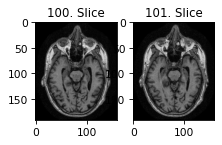

In [46]:
h.show_img('axial', 100, 102, type2)

Shape: (256, 256, 180)


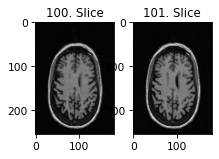

In [47]:
h.show_img('axial', 100, 102, type3)

Shape: (256, 256, 166)


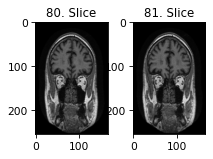

In [48]:
h.show_img('coronal', 80, 82, type1)

Shape: (192, 192, 160)


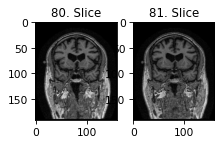

In [49]:
h.show_img('coronal', 80, 82, type2)

Shape: (256, 256, 180)


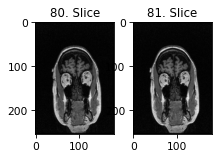

In [50]:
h.show_img('coronal', 80, 82, type3)

Shape: (256, 256, 166)


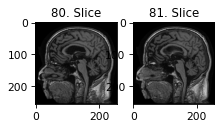

In [51]:
h.show_img('sagittal', 80, 82, type1)

Shape: (192, 192, 160)


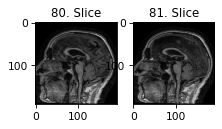

In [52]:
h.show_img('sagittal', 80, 82, type2)

Shape: (256, 256, 180)


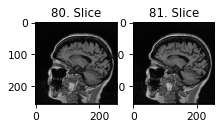

In [53]:
h.show_img('sagittal', 80, 82, type3)

Shape: (256, 256, 166)


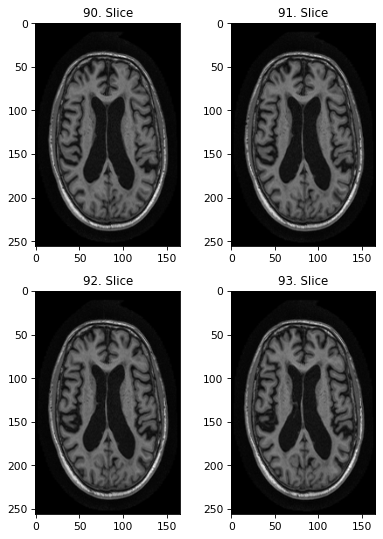

In [36]:
h.show_img('axial', 100, 124, type1)

Shape: (192, 192, 160)


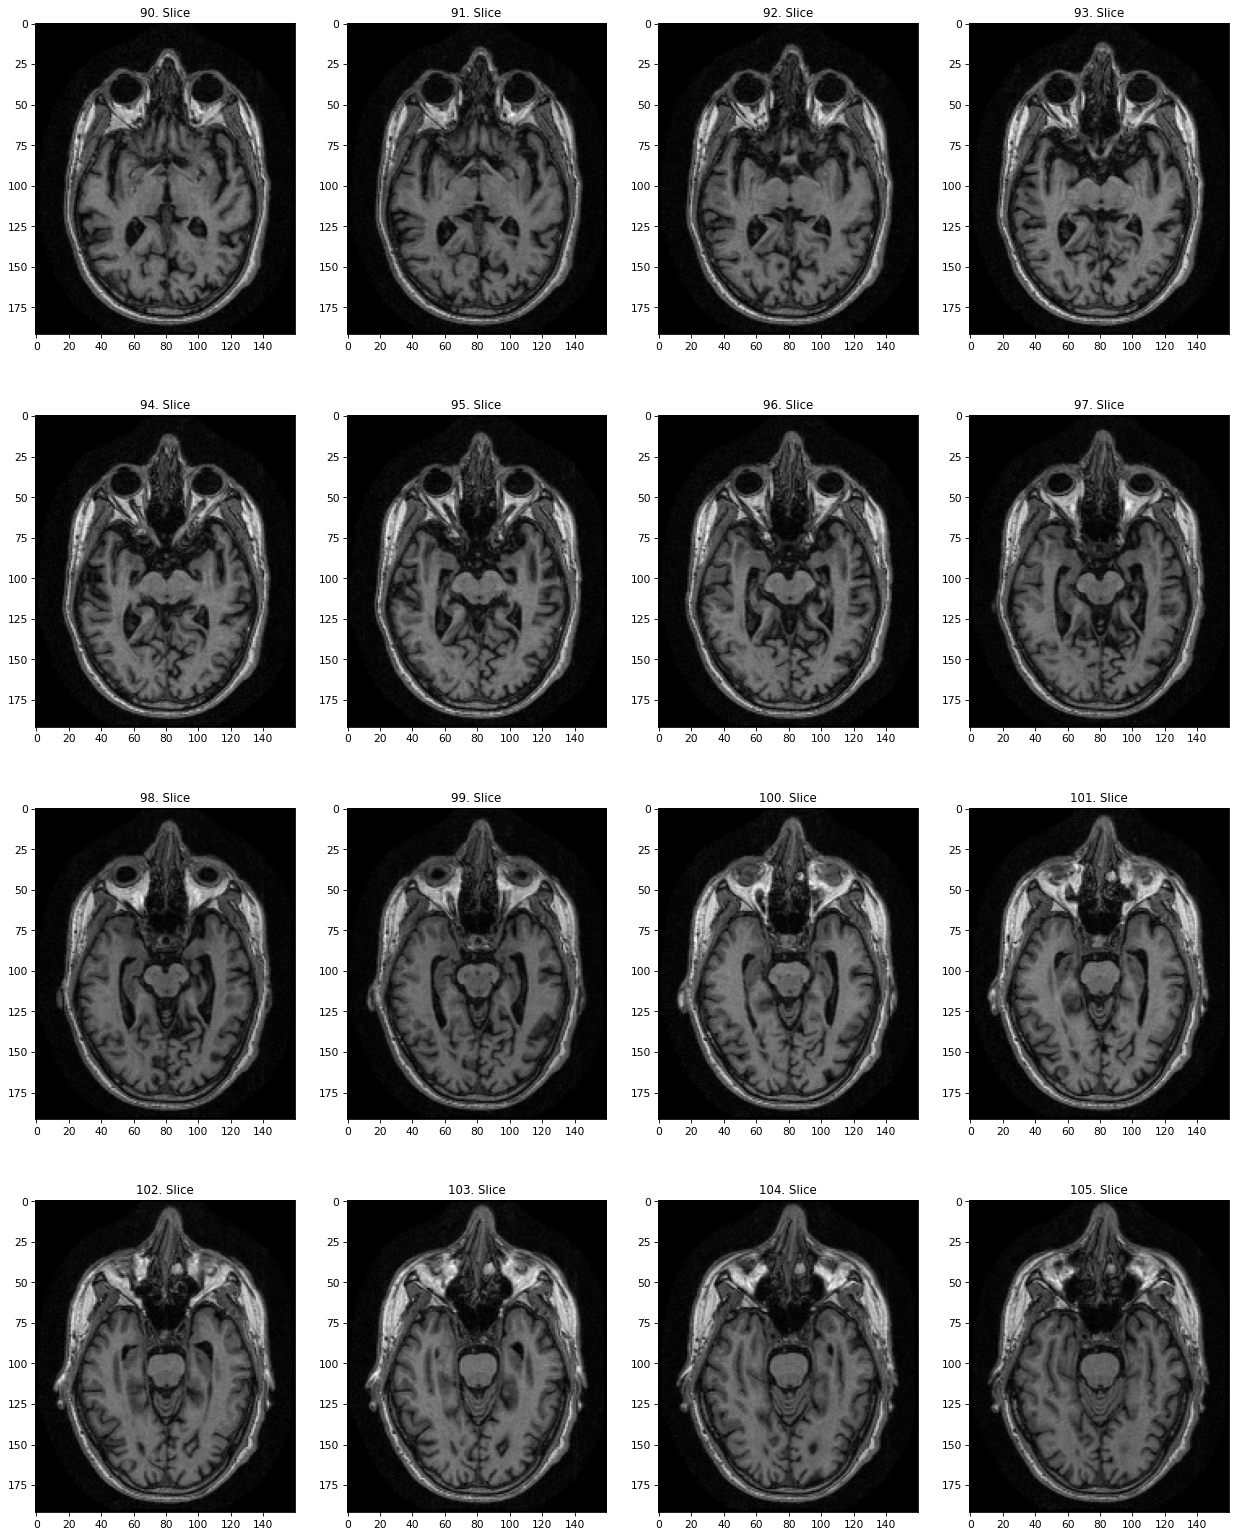

In [42]:
h.show_img('axial', 90, 106, type2)

Shape: (256, 256, 180)


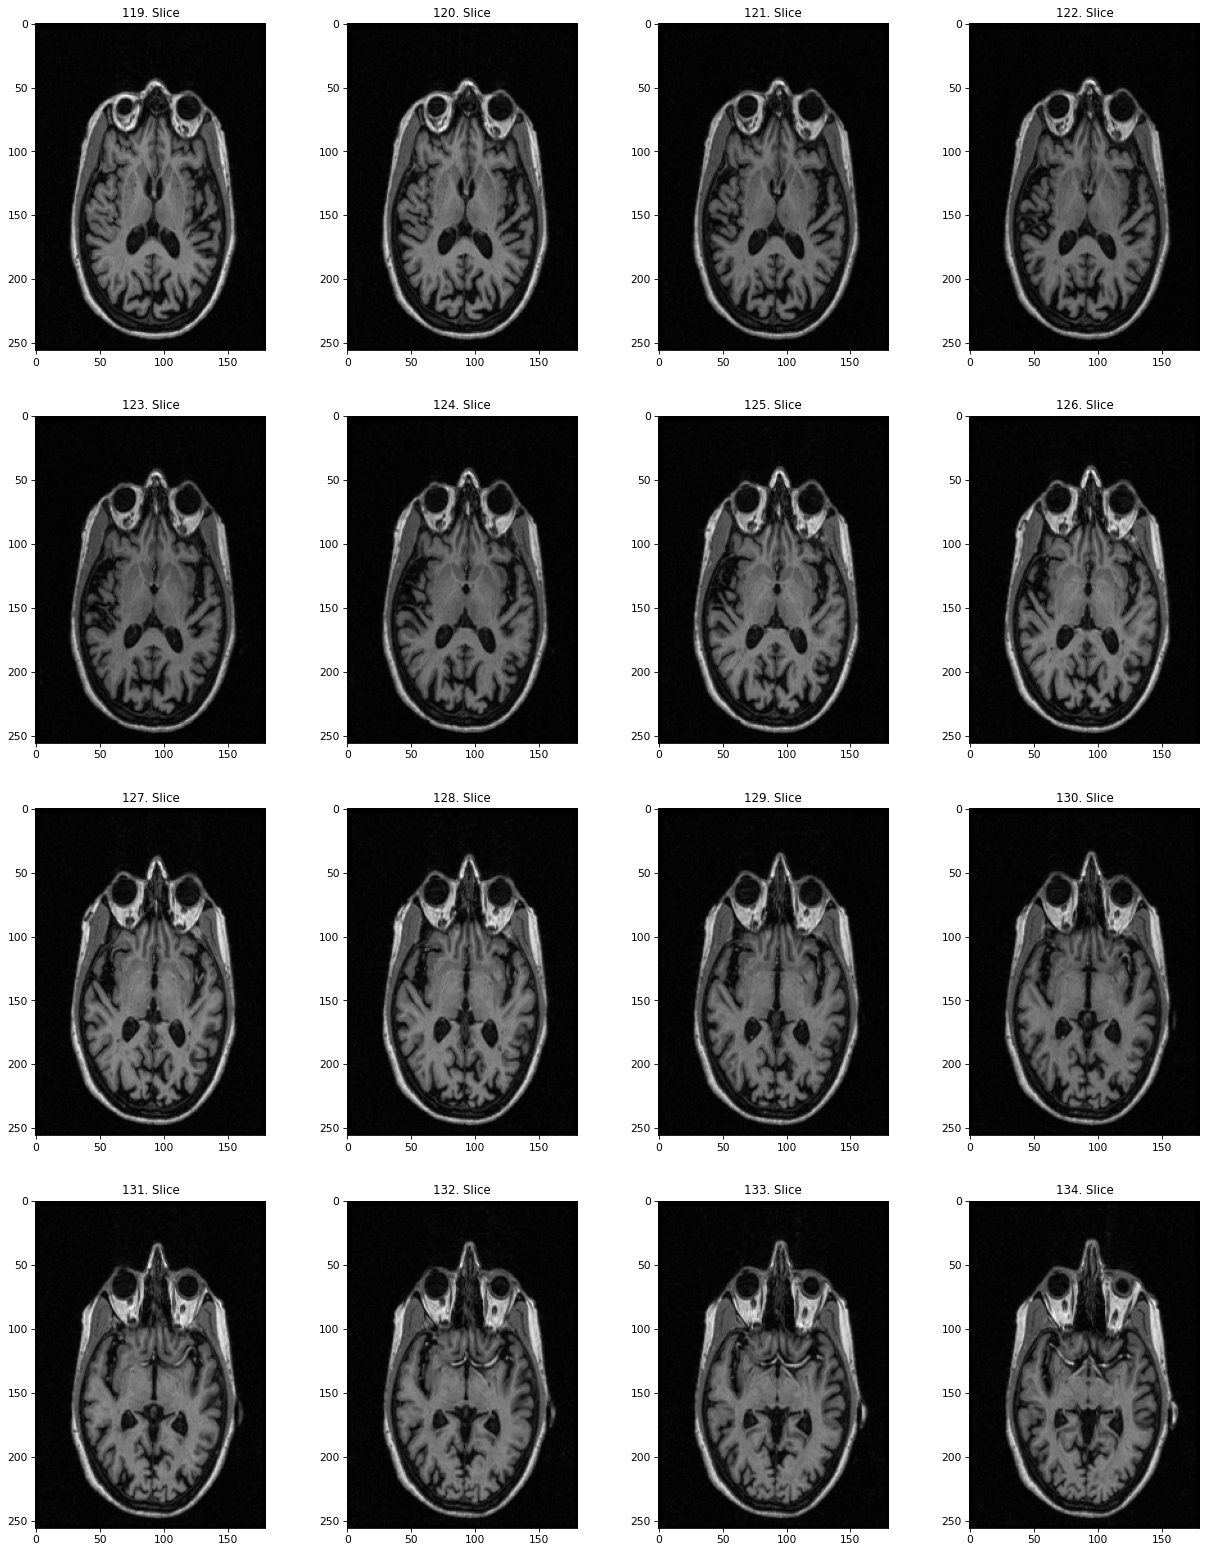

In [44]:
h.show_img('axial', 119, 135, type3)

----

Shape: (256, 256, 166)


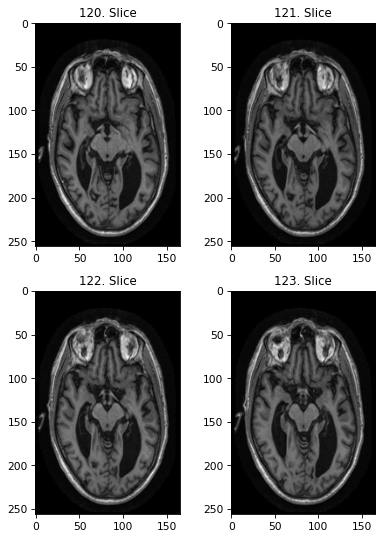

In [39]:
h.show_img('axial', 120, 124, type1)

Shape: (192, 192, 160)


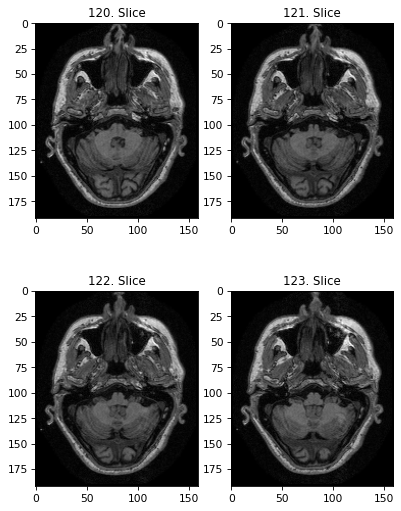

In [40]:
h.show_img('axial', 120, 124, type2)

Shape: (256, 256, 180)


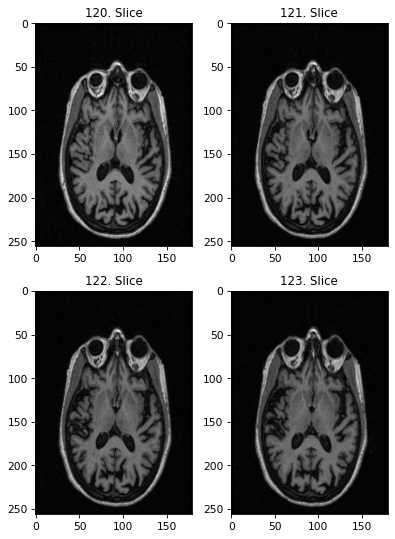

In [41]:
h.show_img('axial', 120, 124, type3)